In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#read the data set
df=pd.read_csv('/content/Iris.csv')
df=df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#to understad the data with statistical measures
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
#to check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# **EDA**

### Histograms

<Axes: >

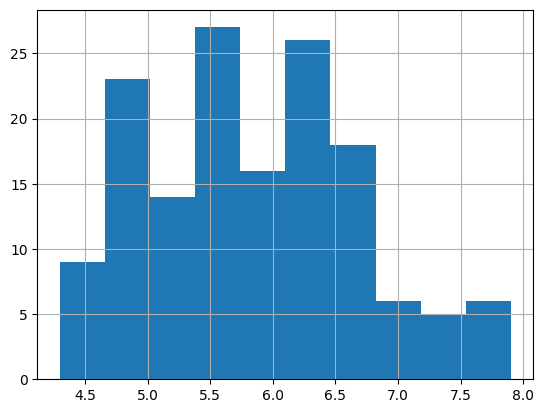

In [9]:
df['SepalLengthCm'].hist()

<Axes: >

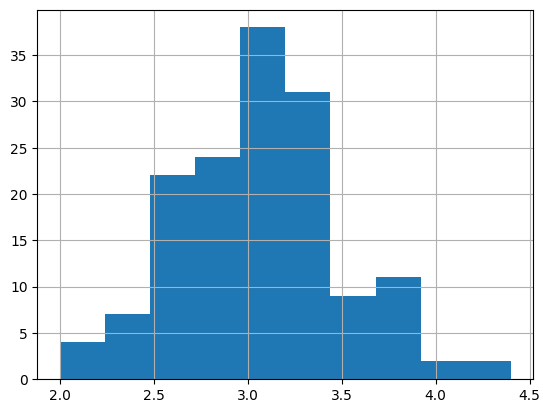

In [32]:
df['SepalWidthCm'].hist()

<Axes: >

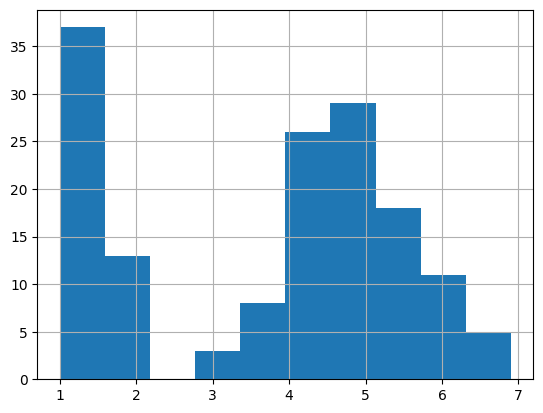

In [11]:
df['PetalLengthCm'].hist()


<Axes: >

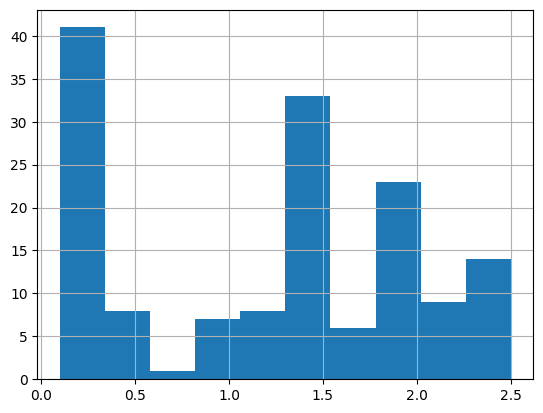

In [12]:
df['PetalWidthCm'].hist()



In [13]:
colour=['red','green','blue']
species= ['Iris-virginica','Iris-versicolor','Iris-setosa']

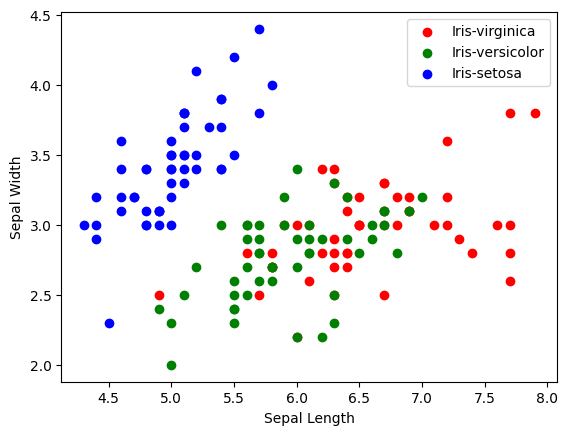

In [14]:
for i in range(3):
  df_species=df[df['Species']==species[i]]
  plt.scatter(df_species['SepalLengthCm'],df_species['SepalWidthCm'],c = colour[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

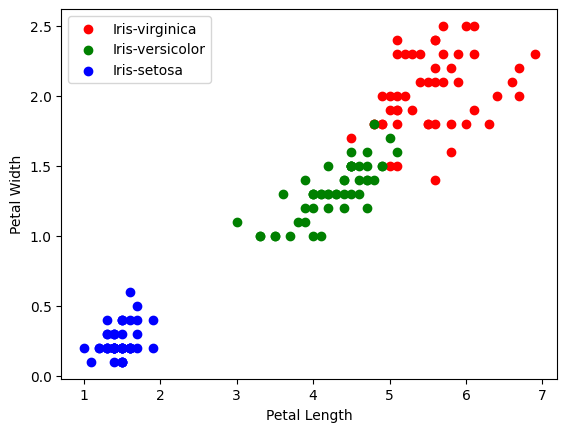

In [15]:
for i in range(3):
  df_species=df[df['Species']==species[i]]
  plt.scatter(df_species['PetalLengthCm'],df_species['PetalWidthCm'],c = colour[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

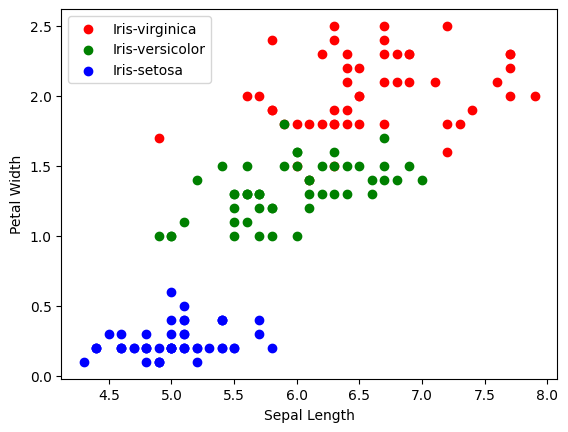

In [16]:
for i in range(3):
  df_species=df[df['Species']==species[i]]
  plt.scatter(df_species['SepalLengthCm'],df_species['PetalWidthCm'],c = colour[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")
plt.legend()

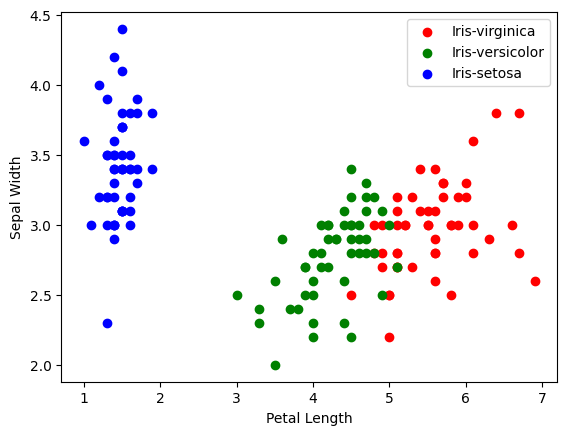

In [17]:
for i in range(3):
  df_species=df[df['Species']==species[i]]
  plt.scatter(df_species['PetalLengthCm'],df_species['SepalWidthCm'],c = colour[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Sepal Width")
plt.legend()

<Axes: >

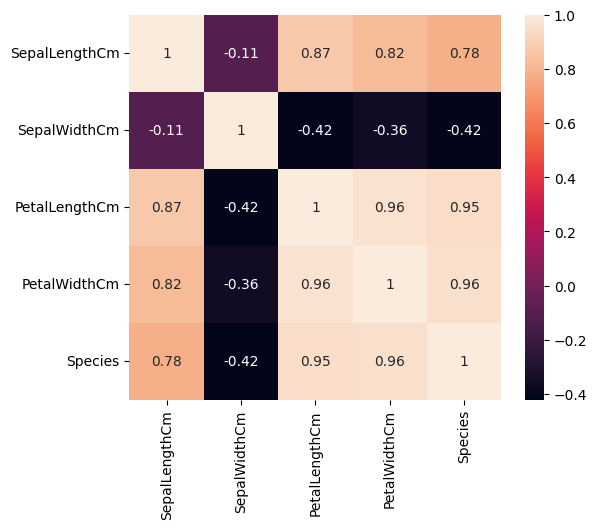

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
corr=df.corr()
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(corr, annot=True, ax=ax)

## Model Training

In [19]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['Species'])
y=df['Species']
x_train ,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [27]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression( max_iter=1000)
model.fit(x_train,y_train)
print("Logistic Regression Accuracy: ",model.score(x_test, y_test) * 100)



Logistic Regression Accuracy:  95.55555555555556


In [28]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)
print("KNN Accuracy: ",model.score(x_test, y_test) * 100)


KNN Accuracy:  100.0


In [29]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
print("Decision Tree Accuracy: ",model.score(x_test, y_test) * 100)

Decision Tree Accuracy:  95.55555555555556


In [30]:
#svc
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(x_train, y_train)
print("SVC Accuracy: ",model.score(x_test, y_test) * 100)

SVC Accuracy:  100.0


In [31]:
#naive bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
print("Naive Bayes Accuracy: ",model.score(x_test, y_test) * 100)

Naive Bayes Accuracy:  93.33333333333333
